<a href="https://colab.research.google.com/github/ayushmangupta/TF2/blob/master/TFP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install --upgrade tensorflow-probability

In [27]:
%matplotlib inline
import tensorflow as tf
tf.enable_eager_execution()
import tensorflow_probability as tfp
import numpy as np
import tensorflow.keras as tfk
from tensorflow_probability import distributions as tfd 
import matplotlib.pyplot as plt
tfb = tfp.bijectors

print(tf.__version__)

1.14.0-rc1


**Poission Distribution**

In [0]:
poi = tfd.Poisson(rate=3)


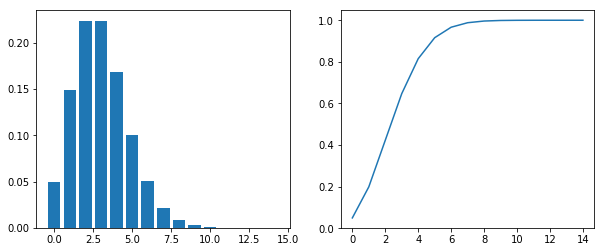

In [26]:
plt.figure(figsize=(10,4))
x = np.arange(15)
plt.subplot(1,2,1)
plt.bar(x=x, height=poi.prob(x))
plt.subplot(122)
plt.plot(x,poi.cdf(x))

**Normal Distribution**


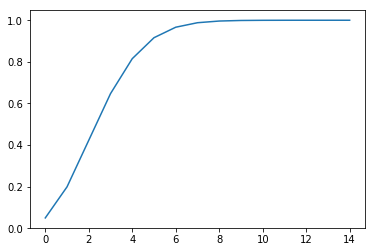

In [0]:
norm_dist = tfd.Normal(loc=0.0,scale=1.0)

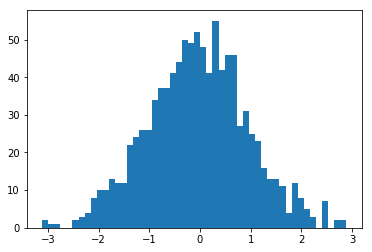

In [19]:
plt.hist(norm_dist.sample(1000),bins=50);

### Vectorize code

In [35]:
mat = tf.random.normal([1000,100,100])
vec = tf.random.normal([1000,100,1])

def forloop():
  for i in range(1000):
    tf.linalg.solve(mat[i,:,:],vec[i,:,:])
    
    
def vecloop():
  tf.linalg.solve(mat,vec)
    
%timeit forloop()
%timeit vecloop()

1 loop, best of 3: 340 ms per loop
10 loops, best of 3: 70.7 ms per loop
